# Phys 110 Lab 1 

In [1]:
import numpy as np
from uncertainties import ufloat
import pandas as pd
import matplotlib.pyplot as plt

Functions to compute uncertainties

In [2]:
def compute_string12(m, a, re_m=0.01, ea=np.radians(1)):
    Fx = m*g*np.cos(a)
    Fy = m*g*np.sin(a)
    
    err_anglex=np.sin(a)*np.sin(ea)
    err_angley=np.cos(a)*np.sin(ea)
    
    rerr_anglex = err_anglex/np.cos(a)
    rerr_angley = err_angley/np.sin(a)
    
    rerr_totx = re_m + np.abs(rerr_anglex)
    err_totx = Fx*rerr_totx
    rerr_toty = re_m + np.abs(rerr_angley)
    err_toty = Fy*rerr_toty
    
    return Fx, Fy, rerr_totx, rerr_toty, err_totx, err_toty

def compute_string3(m, re_m=0.01):
    Fy = m*g
    err_toty = re_m*Fy
    return Fy, err_toty

def sum_forces(m1,m2,m3,a1,a2,re_m=0.01,ea1=np.radians(1),ea2=np.radians(2)):
    Fx1, Fy1, _, _, ex1, ey1 = compute_string12(m1, a1)
    Fx2, Fy2, _, _, ex2, ey2 = compute_string12(m2, a2)
    Fy3, ey3 = compute_string3(m3)
    
    Fx_tot = Fx1-Fx2
    Fy_tot = Fy1+Fy2-Fy3
    ex_tot = ex1+ex2
    ey_tot = ey1+ey2+ey3
    
    return Fx_tot, Fy_tot, ex_tot, ey_tot
    


def print_quantities(m1,m2,m3,a1,a2,re_m=0.01,ea1=np.radians(1),ea2=np.radians(1)):
    Fx, Fy, rerr_totx, rerr_toty, err_totx, err_toty = compute_string12(m1, a1, re_m, ea1)
    print('String 1')
    print('-------------')
    print('Force X: {}'.format(Fx))
    print('Force Y: {}'.format(Fy))
    print('Relative Error X {}'.format(rerr_totx))
    print('Relative Error Y {}'.format(rerr_toty))
    print('Error X: {}'.format(err_totx))
    print('Error Y: {}'.format(err_toty))
    print('-------------')
    Fx, Fy, rerr_totx, rerr_toty, err_totx, err_toty = compute_string12(m2, a2, re_m, ea2)
    print('String 2')
    print('-------------')
    print('Force X: {}'.format(Fx))
    print('Force Y: {}'.format(Fy))
    print('Relative Error X {}'.format(rerr_totx))
    print('Relative Error Y {}'.format(rerr_toty))
    print('Error X: {}'.format(err_totx))
    print('Error Y: {}'.format(err_toty))
    print('-------------')
    print('String 3')
    print('-------------')
    Fy, err_toty = compute_string3(m3)
    print('Force Y: {}'.format(Fy))
    print('Error Y: {}'.format(err_toty))
    print('-------------')
    print('-------------')
    Fx_tot, Fy_tot, ex_tot, ey_tot = sum_forces(m1,m2,m3,a1,a2)
    print('Total Forces')
    print('Force X: {}'.format(Fx_tot))
    print('Force Y: {}'.format(Fy_tot))
    print('Error X: {}'.format(ex_tot))
    print('Error Y: {}'.format(ey_tot))

Function to print values.

In [3]:
m1= 0.55
m2 = 0.5
m3 = 0.4
a1 = np.radians(30)
a2 = np.radians(15)
g = 9.8
print_quantities(m1,m2,m3,a1,a2)

String 1
-------------
Force X: 4.667876926398125
Force Y: 2.695
Relative Error X 0.02007615155457239
Relative Error Y 0.04022845466371718
Error X: 0.0937130046124603
Error Y: 0.1084156853187178
-------------
String 2
-------------
Force X: 4.733036548816435
Force Y: 1.2682133210023516
Relative Error X 0.014676358210849843
Relative Error Y 0.0751332675382842
Error X: 0.06946373981547449
Error Y: 0.09528501074248558
-------------
String 3
-------------
Force Y: 3.9200000000000004
Error Y: 0.039200000000000006
-------------
-------------
Total Forces
Force X: -0.06515962241831019
Force Y: 0.04321332100235109
Error X: 0.16317674442793478
Error Y: 0.2429006960612034


Open mark data.

In [4]:
df1 = pd.read_csv('PHYS_110_201909_B21_LAB.csv')
df2 = pd.read_csv('PHYS_110_201909_B22_LAB.csv')
df = pd.concat([df1, df2], ignore_index=True)

Plot

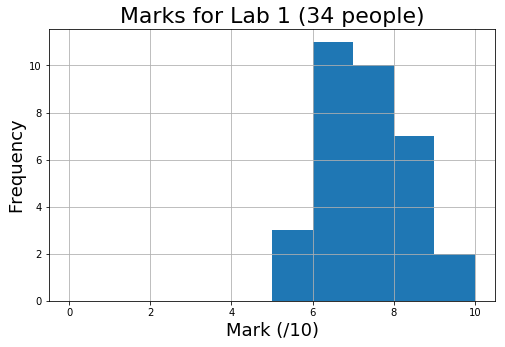

In [8]:
bins = np.arange(0, 11, 1)
plt.figure(figsize=(8,5))
df['1'].hist(bins=bins)
plt.xlabel('Mark (/10)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Marks for Lab 1 (34 people)', fontsize=22)
plt.show()

In [10]:
print('Mean Value {:.2f} ' .format(df['1'].mean()))

Mean Value 7.08 
